# Creative Machine Learning - Probabilities and Bayesian inference

### Author: Philippe Esling (esling@ircam.fr)

In this course we will cover
1. A [quick recap](#recap) on simple probability concepts
2. An introduction to [probability distributions](#distributions)
3. An explanation on how to [sample](#sampling) from distributions ourselves
4. An introduction to [Bayesian inference](#bayesian)
5. A simple implementation of [Maximum Likelihood](#ml)
6. How to optimize [unknown parameters](#)

<a id="probability"> </a>
## Understanding probability

The field of probability aims to model random or uncertain events. We usually refer to random events when we cannot predict the outcome of a phenomenon with absolute certainty. Maybe the simplest and most iconic case of randomness that everyone has encoutered is to _flip a coin_. In that case, we are uncertain of the result, and might see randomness as a way of expressing this uncertainty.

Hence, a random variable $X$ denotes a quantity that is uncertain, such as the result of an experiment (flipping a coin) or the measurement of an uncertain property (the weather of tomorrow). However, if we can observe a sufficiently large set of _samples_ $\{\mathbf{x}_{i}\}_{i=1}$, it might take different values on each occasion, but some values may occur more often than others. Hence, we can start reasoning on these random events from a different perspective. If the coin is fair, and do not have access to any external information, we expect the _probability_ of the result to be heads 1 times out of 2, or equivalently 50\% of the times. Here, the use of percentage informs us on one of the interpretation of probability, as the _relative frequency_ of events. By repeatedly flipping the coin and observing the results, we can count the occurrence of each outcome.

To understand these concepts graphically, we will rely on `numpy` and `matplotlib`

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from cml.plot import cml_figure_matplotlib as figure

2024-11-05 12:38:21.824191: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Definitions
Let's start with some basic definitions and principles.
- An ***experiment*** or ***trial*** is an action with an uncertain outcome, such as tossing a coin.
- A ***sample space*** is the set of all possible outcomes of an experiment. In a coin toss, there's a set of two possible oucomes (*heads* and *tails*).
- A ***sample point*** is a single possible outcome - for example, *heads*)
- An ***event*** is a specific outome of single instance of an experiment - for example, tossing a coin and getting *tails*.
- ***Probability*** is a value between 0 and 1 that indicates the likelihood of a particular event, with 0 meaning that the event is impossible, and 1 meaning that the event is inevitable. In general terms, it's calculated like this:

$$
\begin{equation}
\text{probability of an event} = \frac{\text{Number of sample points that produce the event}}{\text{Total number of sample points in the sample space}} 
\end{equation}
$$

For example, the probability of getting *heads* when tossing as coin is <sup>1</sup>/<sub>2</sub> - there is only one side of the coin that is designated *heads*. and there are two possible outcomes in the sample space (*heads* and *tails*). So the probability of getting *heads* in a single coin toss is 0.5 (or 50% when expressed as a percentage).

In [2]:
vals = ['heads', 'tails']
trials = 5
for t in range(trials):
    # Get a random 0 or 1
    toss = random.randint(0,1)
    # Print the result of our toss
    print('Coin is tossed on ' + vals[toss])

Coin is tossed on heads
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on tails


If we run the previous code several times, we will always get different (uncertain) results, showing the underlying randomness. However, if we start simulating (_sampling_) this _experiment_ a certain number of times, we can start to look at the _distribution_ of _events_ 

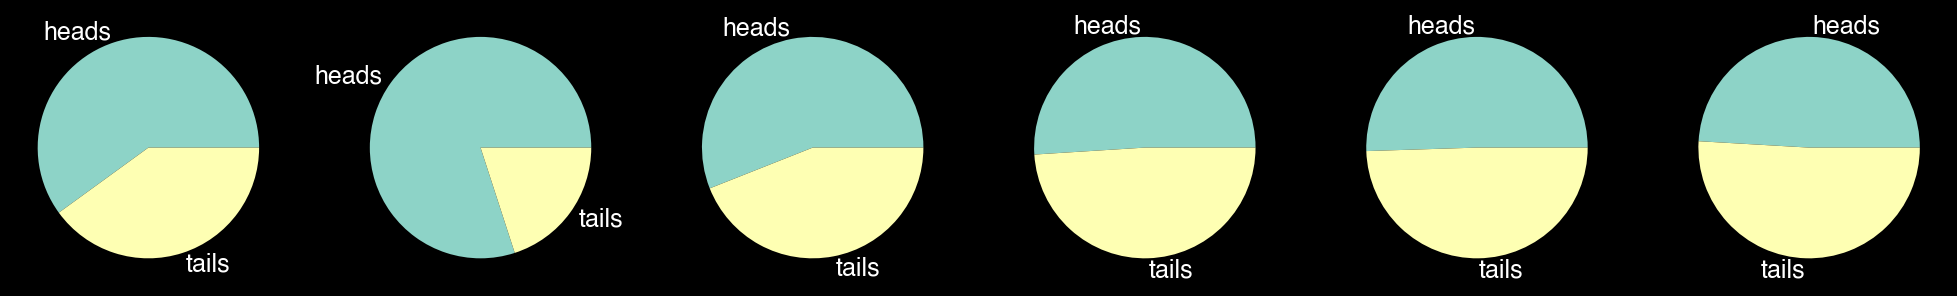

In [3]:
figure(100,25)
# loop through 5,10,50,100,1000,10000 trials
for t_id, trials in enumerate([5,10,50,100,1000,10000]):
    # Keep track
    heads_or_tails = [0, 0]
    for t in range(trials):
        # Get a random 0 or 1
        toss = random.randint(0,1)
        # Increment the list element corresponding to the toss result
        heads_or_tails[toss] = heads_or_tails[toss] + 1
    # Show a pie chart of the results
    plt.subplot(1, 6, t_id+1)
    plt.pie(heads_or_tails, labels=['heads', 'tails'])
    
plt.show()

<a id="theory"> </a>
## Probability theory

Probability theory defines the mathematical framework that allows to describe and analyze random phenomena, regardless of the interpretation of probability that we prefer. To rely on this framework, we starts by assuming few axioms of probability. We postulate a set of possible events $\Omega$ called the *sample space* (in our coin toss example, we would have $\Omega = \{Heads, Tails\}$. We can define a _probability measure_ $p(\omega)$ to an event $\omega\in\Omega$, which gives a value between 0 (very unlikely) and 1 (very probable) that shows how likely the event is. In our previous example, we could write that the probability of throwing a 7 is expressed as

$$
p(\omega = 7) = 0.167
$$

where our sample space is defined as $\Omega = \{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}$

### Axioms of probability
The foundation of probability theory is defined in these axioms, on which we can develop tools and techniques to calculate probabilities of different events.

- For any event $\omega\in\Omega$, $0\leq p(\omega) \leq 1$.
- Probability of the sample space $\Omega$ is $p(\Omega)=1$.
- For a set of \textit{disjoint} events $\omega_1,\cdots,\omega_n$ we have $p(\bigcup_{i=1}^{n} \omega_i)=\sum_{i=1}^{n} \omega_{i}$

The first axiom is quite straightforward and states that probability is measured in the interval $[0,1]$. The second axiom states that the probability of the whole sample space is equal to one, as it contains all possible outcomes of our random experiment. For instance, in our coin toss, the outcome will always be either $Heads$ or $Tails$, and therefore will always be contained in $\Omega$. Finally, the third axioms state that for two disjoint events, the probability of one or the other to happen is the sum of their individual probabilities.

<a id="recap"> </a>

## Quick recap on probability

The field of probability aims to model random or uncertain events through random variables $X$ denoting a quantity that is uncertain, which take values $\omega$ in a sample space $\omega \in \Omega$. If we observe several occurrences of this variable $\{\mathbf{x}_{i}\}_{i=1}$, we might try to model the _probability distribution_ $p(\mathbf{x})$ of that variable. We recall here that the probability of an event $a$ is a real number $p(a)$, with $0 \leq p(a) \leq 1$, knowing that $p(\Omega)=1$ and $p(\{\})=0$. The probability of two events occuring simultaneously is defined as $p\left(a, b \right)$ (or equivalently as $p\left(a \cup b \right)$). Therefore, the probability of one event **or** the other occuring is defined as
$
\begin{equation}
p\left(a \cap b \right) = p(a) + p(b) - p\left(a \cup b \right)
\end{equation}
$

The *conditional probability* of an event $a$ occuring *given* another event $b$ is denoted $p \left(a \mid b \right)$ and is defined as
$$
\begin{equation}
p \left(a \mid b \right) = \frac{p \left(a , b \right)}{p \left(b \right)}
\end{equation}
$$

This can be understood as the probability of event $a$ to occur if we restrict the world of possibilities to event $b$. The *chain rule* defines the probabilities of a set of events to co-occur simultaneously
$$
\begin{equation}
p \left(x_{1},...,x_{n} \right) = \prod_{i=n}^{1}{p \left(x_{i}\mid x_{i-1},..., x_{1} \right)}
\end{equation}
$$

Finally, we say that two events are independent if $p(a\mid b) = p(a)$.

To understand these concepts graphically, we will rely on `PyTorch` and specifically the `distributions` package.

In [4]:
import torch.distributions as distribution
import torch.distributions.transforms as transform
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id="distributions"> </a>
### Probability distributions

Let $X$ be a random variable associated with a *probability distribution function* that assigns probabilities to the different outcomes $X$ can take in the sample space. We can divide random variables into three different types:

- **$X$ is discrete**: Discrete random variables may only assume values on a specified list. 
- **$X$ is continuous**: Continuous random variable can take on arbitrarily exact values. 
- **$X$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, (i.e. a combination of the above two categories). 

**Expected Value**
The expected value $\mathbb{E}\left[X\right]$ for a given probability distribution can be described as _"the mean expected value for many repeated samples from that distribution."_ As the number of repeated observation goes to infinity, the difference between the average outcome and the expected value becomes arbitrarily small. Formally, it is defined for discrete variables as

$$
\mathbb{E}\left[X\right] = \sum\limits_{i}\mathbf{x}_i p(\mathbf{x}=\mathbf{x}_i)
$$

#### Discrete distributions

If $X$ is discrete, then its distribution is called a *probability mass function* (pmf), which measures the probability $X$ takes on the value $x_{i}$, denoted $P(X=x_{i})$. Let $\mathbf{x}$ be a discrete random variable with range $R_{X}=\{x_1,\cdots,x_n\}$ (finite or countably infinite). The function

$$
p_{X}(x_{i})=p(X=x_{i}), \forall i\in\{1,\cdots,n\}
$$

is called the probability mass function (PMF) of $X$.

Hence, the PMF defines the probabilities of all possible values for a random variable. The above notation allows to express that the PMF is defined for the random variable $X$, so that $p_{X}(1)$ gives the probability that $X=1$. For discrete random variables, the PMF is also called the \textit{probability distribution}. The PMF is a probability measure, therefore it satisfies all the corresponding properties
- $0 \leq p_{X}(x_i) < 1, \forall x_i$
- $\sum_{x_i\in R_{X}} p_{X}(x_i) = 1$
- $\forall A \subset R_{X}, p(X \in A)=\sum_{x_a \in A}p_{X}(x_a)$

A very simple example of discrete distribution is the `Bernoulli` distribution. With this distribution, _we can model a coin flip_, if it has equal probability. More formally, a Bernoulli distribution is defined as

$$ 
Bernoulli(x)= p^x (1-p)^{(1-x)} 
$$

with $p$ controlling the probability of the two classes. Hence, a fair coin should have $p=0.5$, and if we throw the coin a very large number of times, we hope to see on average an equal amount of _heads_ and _tails_.

tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])


<Figure size 48000x64000 with 0 Axes>

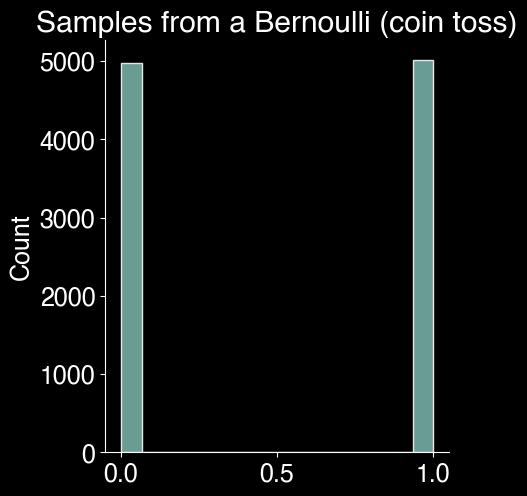

In [5]:
bernoulli = distribution.Bernoulli(0.5)
samples = bernoulli.sample((10000,))
print(samples[:10])
figure(640, 480)
sns.displot(samples)
plt.title("Samples from a Bernoulli (coin toss)")
plt.show()

However, we can also _sample_ from the distribution to have individual values of a single throw. In that case, we obtain a series of separate events that _follow_ the distribution 

In [6]:
vals = ['heads', 'tails']
samples = bernoulli.sample((10, ))
for s in samples:
    print('Coin is tossed on ' + vals[int(s)])

Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on tails
Coin is tossed on heads


Now, we can mess up our probability to model an unfair (loaded) coin, as shown in the following example (where we use a cheated coin that should give us a lot more of _heads_ than _tails_) 

<Figure size 48000x64000 with 0 Axes>

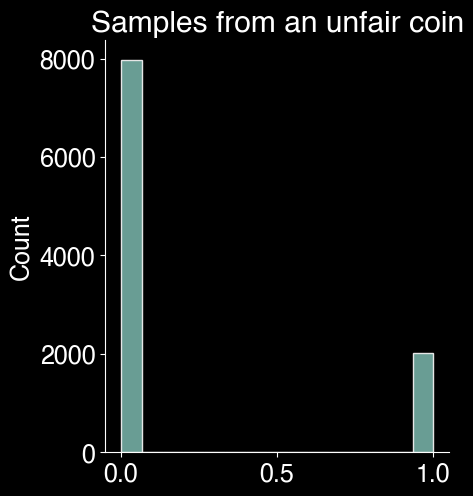

Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads
Coin is tossed on heads


In [7]:
bernoulli = distribution.Bernoulli(0.2)
samples = bernoulli.sample((10000,))
figure(640, 480); sns.displot(samples)
plt.title("Samples from an unfair coin"); plt.show()
vals = ['heads', 'tails']
samples = bernoulli.sample((10, ))
for s in samples:
    print('Coin is tossed on ' + vals[int(s)])

#### Poisson distribution

Let's introduce one of the (many) useful probability mass functions. We say $Z$ is *Poisson*-distributed if:

$$
\begin{equation}
P\left(Z = k\right) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k \in \mathbb{N^{+}} 
\end{equation}
$$

$\lambda \in \mathbb{R}$ is a parameter of the distribution that controls its shape (usually termed the *intensity* of the Poisson distribution). By increasing $\lambda$, we add more probability to larger values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. If a random variable $Z$ has a Poisson mass distribution, we denote it by

$$
\begin{equation}
Z \sim \text{Poi}(\lambda) 
\end{equation}
$$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will plot the probability mass distribution for different $\lambda$ values.

### Continuous distributions

The same ideas apply to _continuous_ random variables, which can model for instance the height of human beings. If we try to guess the height of someone that we do not know, there is a higher probability that this person will be around 1m70, instead of 20cm or 3m. For the rest of this course, we will use the shorthand notation $p(\mathbf{x})$ for the distribution $p(\mathbf{x}=x_{i})$,  which expresses for a real-valued random variable $\mathbf{x}$, evaluated at $x_{i}$, the probability that $\mathbf{x}$ takes the value $x_i$.

One notorious example of such distributions is the Gaussian (or Normal) distribution, which is defined as 
\begin{equation}
    p(x)=\mathcal{N}(\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
\end{equation}

Similarly as before, we can observe the behavior of this distribution with the following code (in our height example)

tensor(146.6731)


<Figure size 48000x64000 with 0 Axes>

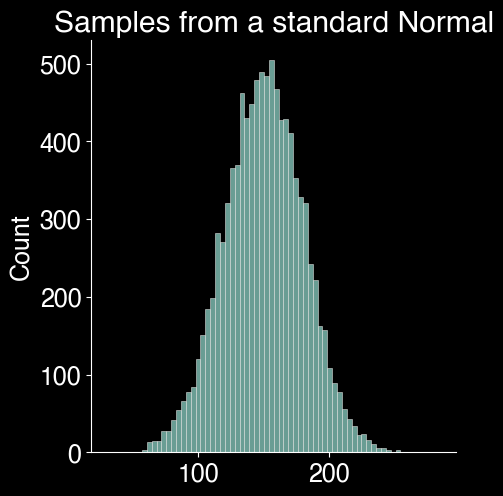

In [8]:
normal = distribution.Normal(150., 30.)
samples = normal.sample((10000, ))
figure(640, 480)
sns.displot(samples)
print(samples[0])
plt.title("Samples from a standard Normal")
plt.show()
import torch
# Uncomment to compute probability of an event
# print(torch.exp(normal.log_prob(torch.Tensor(150))))

If we have access to this complete probability distribution (its exact parameterization and function), we can generate 

An example of continuous random variable is a random variable with *exponential density*

$$
\begin{equation}
f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0
\end{equation}
$$

When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential*

$$Z \sim \text{Exp}(\lambda)$$

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$ 

<a id="distribs"></a>
### PyTorch distributions

Here, we rely on the [PyTorch distributions module](https://pytorch.org/docs/stable/_modules/torch/distributions/), which is defined in `torch.distributions`. Most notably, we are going to rely both on the `Distribution` and `Transform` objects.

In [9]:
# Imports for plotting
import numpy as np
import matplotlib.pyplot as plt
# Define grids of points (for later plots)
x = np.linspace(-4, 4, 1000)
z = np.array(np.meshgrid(x, x)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

Inside this toolbox, we can already find some of the major probability distributions that we are used to deal with


In [10]:
p = distribution.Normal(loc=0, scale=1)
p = distribution.Bernoulli(probs=torch.tensor([0.5]))
p = distribution.Beta(concentration1=torch.tensor([0.5]), concentration0=torch.tensor([0.5]))
p = distribution.Gamma(concentration=torch.tensor([1.0]), rate=torch.tensor([1.0]))
p = distribution.Pareto(alpha=torch.tensor([1.0]), scale=torch.tensor([1.0]))

The interesting aspect of these `Distribution` objects is that we can both obtain some samples from it through the `sample` (or `sample_n`) function, but we can also obtain the analytical density at any given point through the `log_prob` function

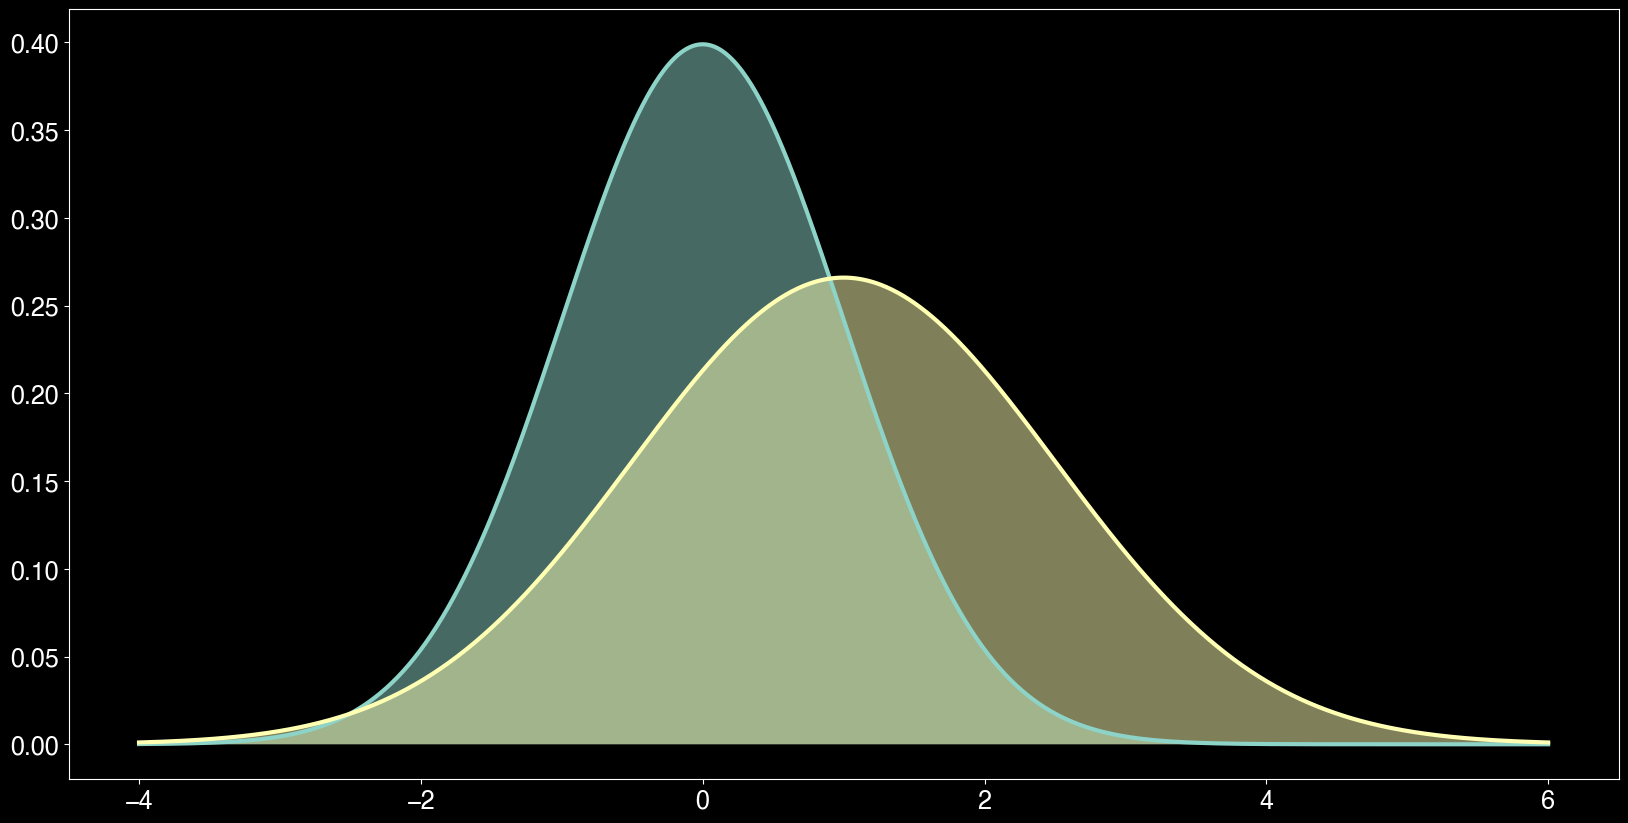

In [11]:
import torch
import torch.distributions as distrib
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-4, 6, 1000)
# Based on a normal
n = distrib.Normal(0, 1)
n2 = distrib.Normal(1, 1.5)
# Obtain some samples
samples = n.sample((1000, ))
# Evaluate true density at given points
density = torch.exp(n.log_prob(torch.Tensor(x))).numpy()
density2 = torch.exp(n2.log_prob(torch.Tensor(x))).numpy()
# Plot both samples and density
plt.figure(figsize=(20, 10))
# Compare both distributions
plt.plot(x, density); plt.fill_between(x, density, 0, alpha=0.5)
plt.plot(x, density2); plt.fill_between(x, density2, 0, alpha=0.5)

Here you can experiment with different distributions, and try to compare how they behave depending on their parameters and also on how much _samples_ you draw from these.

In [12]:

######################
# YOUR CODE GOES HERE
######################
    

<a id="sampling"></a>
## Sampling from distributions

The advantage of using probability distributions is that we can *sample* from these to obtain examples that follow the distribution. For instance, if we perform sampling repeatedly (up to infinity) from a Gaussian PDF, the different values will be distributed following the exact Gaussian distribution. However, although we know the PDF, we need to compute the *Cumulative Distribution Function* (CDF), and then its inverse to obtain the sampling function. Therefore, if we denote the PDF as $f_{X}(x)$, we need to compute the CDF 

$$
\begin{equation}
F_{X}\left(x\right)=\intop_{\infty}^{x}f_{X}\left(t\right)dt
\end{equation}
$$

Then, the *inverse sampling method* consists in solving and applying the inverse CDF $F_{X}^{-1}\left(x\right)$. Here, we recall that the Exponential probability is defined with the following function.

$$
p_{\lambda}(x) = \lambda e^{-\lambda x}
$$

with $\lambda$ defining the _rate_ parameter. Therefore, to be able to define our own `sample` method, we need to solve for

$$
F^{-1}_Y(x) = \left(\int_0^x \lambda e^{-\lambda y} dy\right)^{-1}
$$

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 1.1 - Inverse transform method for sampling

> 1. Code the exponential probability density functions 
> 2. Perform the inverse transform method on the exponential distribution PDF
> 3. Code the `sample_exponential` function to sample from the exponential
> 4. (**optional**) Perform the same operations for sampling from the Beta distribution
  
</div>

***

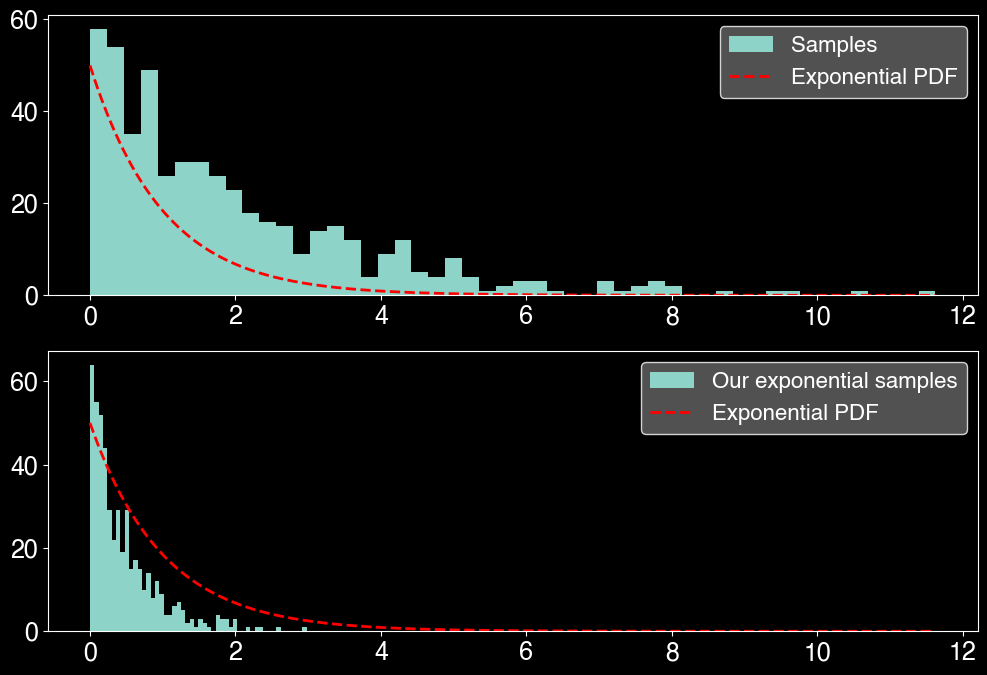

In [21]:
from scipy.stats import expon
nb_samples = 500
nb_bins = 50

def sample_exponential(mu, n, m):
    # mu: rate of the exponential distribution
    # n: number of samples to generate
    # m: number of times to repeat the generation

    samples = []
    for _ in range(m):
        u = np.random.uniform(0, 1, n)
        samples.append(-np.log(1-u)/mu)
    return samples

# Exponential distribution
mu = 2
samples = np.random.exponential(mu, nb_samples)
samples_ex = sample_exponential(mu, nb_samples, 1)
# Compute the PDF
X = np.linspace(0, np.max(samples), int(np.max(samples)) * 100)
y1 = expon.pdf(X) #* (nb_samples / nb_bins) * int(np.max(samples) * 1.5)
# Display both
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.hist(samples, 50, label='Samples')
plt.plot(X,y1*nb_samples/10,ls='--',c='r',linewidth=2, label='Exponential PDF')
plt.legend(loc=1)
plt.subplot(2,1,2)
plt.hist(samples_ex[0], 50, label='Our exponential samples')
plt.plot(X,y1*nb_samples/10,ls='--',c='r',linewidth=2, label='Exponential PDF')
plt.legend(loc=1)

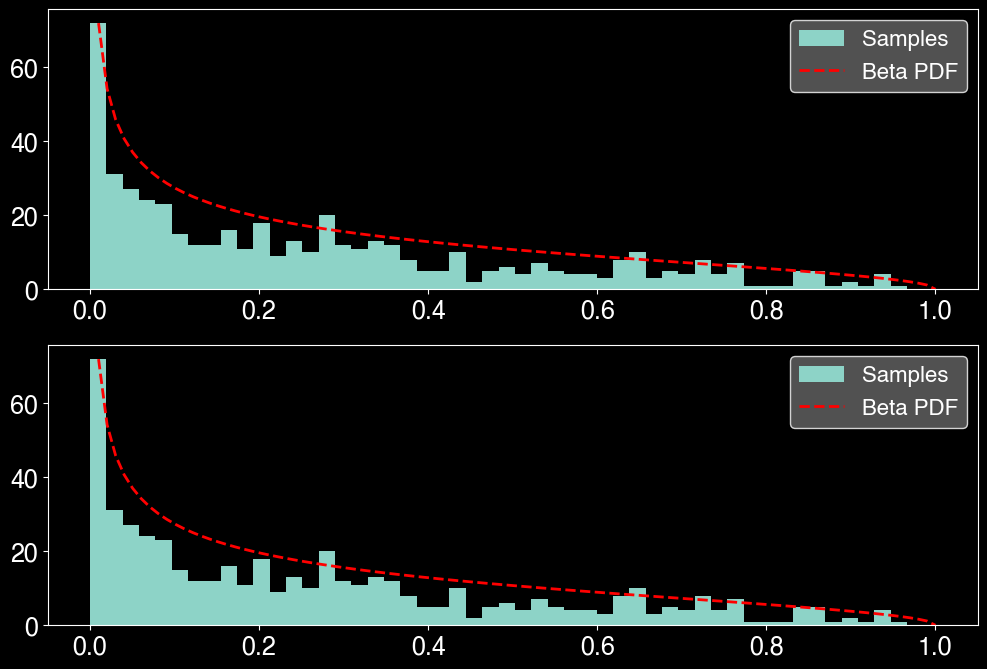

In [14]:
def sample_beta(a, b, M, N):
    
    ######################
    # YOUR CODE GOES HERE
    ######################
    
    return samples

from scipy.stats import beta
# Beta distribution
a = 0.6
b = 1.5
samples = np.random.beta(a, b, nb_samples)
samples_beta = sample_beta(a, b, nb_samples, 1)
# Compute the PDF
X = np.linspace(0, 1, 100)
y1 = beta.pdf(X, a, b) * (nb_samples / nb_bins) * (np.max(samples) * 1.5)
# Display both
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.hist(samples, 50, label='Samples')
plt.plot(X,y1,ls='--',c='r',linewidth=2, label='Beta PDF')
plt.legend(loc=1)
plt.subplot(2,1,2)
plt.hist(samples_beta, 50, label='Samples')
plt.plot(X,y1,ls='--',c='r',linewidth=2, label='Beta PDF')
plt.legend(loc=1)

<a id="recap"> </a>
# Bayesian inference

Here, we discuss *Bayesian inference* and how to use the **Bayes theorem** to perform classification. First, we will see how to derive *estimators* for the different properties of the distributions, and verify that these are *unbiased*. Then, we will implement the **Maximum Likelihood** Estimators (MLE) in order to perform classification of a dataset. First, we will assess the case where parameters are known to implement the discriminant function and decision rule. Then, we will perform the MLE to obtain the means and covariance matrix for each class.

To understand these concepts graphically, we will rely on both the `scikit-learn` and `Pytorch` libraries (with the `probability` package).

In [4]:
import torch
import torch.distributions as distribution
import torch.distributions.transforms as transform
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Bayesian framework

Two alternative interpretations of probability can be considered  

  * **Frequentist** (*classical* approach), assumes that probability is the *long-term frequency of events*. This becomes harder to interpret when events have no long-term frequency (eg. probability in an election, which happens only once). In that case, frequentists consider the *frequency of occurrences across alternative realities*, which defines the probability. 
  * **Bayesian** interprets probability as measure of *believability in an event*. Therefore, a probability is measure of *belief*, or confidence, of an event occurring. This definition leaves room for conflicting beliefs based on the different *information* about the world. Hence, bayesian inference is mostly based on *updating your beliefs* after considering new *evidence*.

To align with probability notation, we denote a belief about event $a$ as $p\left(a\right)$, called the *prior probability* of an event to occur. We denote the updated belief as $ p\left( a \mid e \right) $, interpreted as the probability of $a$ *given* the new evidence $e$, called the *posterior probability*. The prior belief is not completely removed, but we *re-weight this prior* to incorporate new evidence $e$ (i.e. we put more weight, or confidence, on some beliefs versus others). By introducing prior uncertainty about events, we admit that any guess we make can be wrong. As we gather an *infinite* amount of evidence $N \rightarrow \infty$, the Bayesian results (often) align with frequentist results. Hence for small $N$, inference is *unstable*, where frequentist estimates have more variance and larger confidence intervals. However, by introducing a prior, and returning probabilities, we *preserve the uncertainty* that reflects the instability on a small $N$ dataset.  

Updating the *prior belief* to obtain our *posterior belief* is done via the the Bayes' Theorem

$$
\begin{equation}
 p\left( a \mid e \right) \propto \frac{ p\left(e \mid a\right) p\left(a\right) } {p\left(e\right) }
\end{equation}
$$

We see that our posterior belief of event $a$ given the new evidence $e$ is proportional to ($\propto$) the *likelihood* of observing this particular evidence $e$ given the event $a$ ($p\left(e \mid a\right)$) multiplied by our prior belief in that particular event $a$ ($p\left(a\right)$).

### Using Bayesian classification (in `scikit-learn`)

The Bayesian classification methods rely on Bayes's theorem, where we are interested in finding the probability of a label $y$ given some observed features, which we can write as $p(y~|~\mathbf{x})$. Bayes's theorem tells us how to express this in terms of quantities that we can compute more directly

$$
p(y~|~\mathbf{x}) = \frac{p(\mathbf{x}~|~y)p(y)}{p(\mathbf{x})}
$$

If we are trying to decide between two labels ($y_1$ and $y_2$), then one way to make this decision is to compute the ratio of the posterior probabilities for each label

$$
\frac{p(y_1~|~\mathbf{x})}{p(y_2~|~\mathbf{x})} = \frac{p(\mathbf{x}~|~y_1)}{p(\mathbf{x}~|~y_2)}\frac{p(y_1)}{p(y_2)}
$$

All we need now is some model by which we can compute $p(\mathbf{x}~|~y_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model. If we make *very naive assumptions* (called *Naive Bayes*) about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

#### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*. Imagine that we have the following data

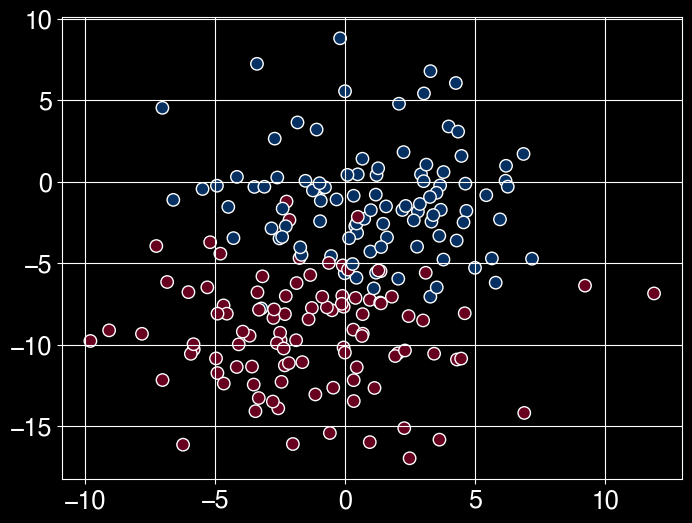

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=3.2)
figure(6, 8); plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='RdBu', edgecolor='w'); plt.grid(True)

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

With this generative model for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point. This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [24]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot the data and see where the decision boundary is

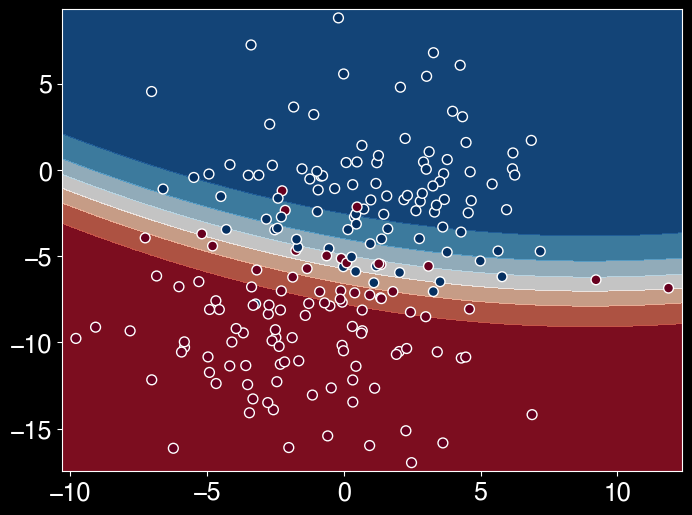

In [25]:
fig = figure(6,8); ax = fig.add_subplot(111)
# predict the classification probabilities on a grid
xlim = X[:, 0].min() - .5, X[:, 0].max() + .5
ylim = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71), np.linspace(ylim[0], ylim[1], 81))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu', edgecolor='w');

We see a slightly curved boundary in the classifications (generally, the boundary in Gaussian naive Bayes is quadratic). A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [26]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.74, 0.26],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.86, 0.14],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.79, 0.21]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach. Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.

## Bayesian inference

Suppose we have coin and want to estimate the probability of heads ($p$) for it. The coin is Bernoulli distributed:

$$ 
\begin{equation}
\phi(x)= p^x (1-p)^{(1-x)} 
\end{equation}
$$

where $x$ is the outcome, *1* for heads and *0* for tails. Based on $n$ *independent* flips, we have the likelihood:

$$ 
\begin{equation}
\mathcal{L}(p|\mathbf{x})= \prod_{i=1}^n p^{ x_i }(1-p)^{1-x_i} 
\end{equation}
$$

(the independent-trials assumption allows us to just substitute everything into $ \phi(x)$). 

The idea of *maximum likelihood* will be to maximize this as the function of $p$ after given all of the $x_i$ data. This means that our estimator, $\hat{p}$, is a function of the observed $x_i$ data, and as such, is a random variable with its own distribution.

**Defining the estimator**

The only way to know for sure that our estimator is correctly defined is to check if the estimator is unbiased, namely, if

$$ \mathbb{E}[\hat{p}] = p $$


### Understanding this behavior with `pytorch`

Without solving for the previous exercise, we can  Let's say that we have 100 samples from a Bernoulli distribution.

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])


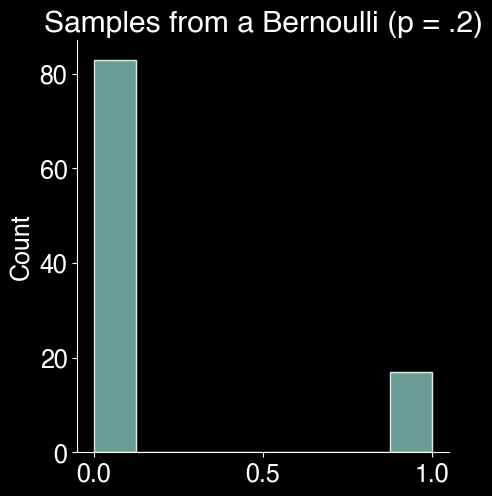

In [27]:

bernoulli = distribution.Bernoulli(0.2)
sample = bernoulli.sample((100, ))




sns.displot(sample)
plt.title("Samples from a Bernoulli (p = .2)")
torch.mean(sample)
print(sample[:10])

In [6]:
import torch.distributions as distrib
normal1d = distrib.Normal(0, 1)
samples = normal1d.sample((10,2,2))
print(samples.shape)
normal2d = distrib.MultivariateNormal(torch.Tensor([0, 1]), torch.eye(2))
normal2d.sample((10,))

torch.Size([10, 2, 2])


tensor([[-1.6141,  0.3671],
        [ 1.3573,  2.6378],
        [-0.5960,  1.3525],
        [-0.0932, -0.8547],
        [-0.2625, -0.0625],
        [-0.4295,  0.0184],
        [-0.2780,  0.9657],
        [ 0.5876,  0.6538],
        [-1.6743,  0.8650],
        [ 0.6024,  2.1372]])

Now we can use our estimator, and define our problem more formally, by defining our input samples as a dataset of observations $x$, and we are trying to model this set, as a `Bernoulli` distribution, for which the $p$ parameter is unknown (here defined as a `Variable`).

In [7]:
from torch.autograd import Variable
x = torch.Tensor(sample)
#p = Variable(torch.rand(1), requires_grad=True)
p = torch.Tensor(1)
p[0] = 0.55
p.requires_grad = True
#p = Variable(torch.Tensor([0.9]), requires_grad=True)

NameError: name 'sample' is not defined

Now we can use our estimator to gradually compute the Maximum Likelihood, in order to uncover the estimated probability of the underlying distribution, solely based on observing the samples.

In [30]:
learning_rate = 0.00002
for t in range(100):
    # Forward pass
    # Negative log-likelihood
    NLL = -torch.sum(torch.log(x*p + (1-x)*(1-p)) )
    # Automatic differentiation
    NLL.backward()
    p.data
    p.grad.data
    if t % 10 == 0:
        print("loglik = %.4f - p = %.4f - dL/dp = %.4f"%(NLL.data.numpy(), p.data.numpy(), p.grad.data.numpy()))   
    p.data -= learning_rate * p.grad.data
    p.grad.data.zero_()
print('Final probability p =', p.data[0])

loglik = 76.4394 - p = 0.5500 - dL/dp = 153.5354
loglik = 72.1079 - p = 0.5205 - dL/dp = 140.4409
loglik = 68.4580 - p = 0.4934 - dL/dp = 129.4004
loglik = 65.3435 - p = 0.4684 - dL/dp = 119.8556
loglik = 62.6616 - p = 0.4452 - dL/dp = 111.4356
loglik = 60.3371 - p = 0.4237 - dL/dp = 103.8835
loglik = 58.3134 - p = 0.4035 - dL/dp = 97.0154
loglik = 56.5466 - p = 0.3847 - dL/dp = 90.6962
loglik = 55.0017 - p = 0.3671 - dL/dp = 84.8251
loglik = 53.6503 - p = 0.3506 - dL/dp = 79.3255
Final probability p = tensor(0.3352)


/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_11725/4049130811.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("loglik = %.4f - p = %.4f - dL/dp = %.4f"%(NLL.data.numpy(), p.data.numpy(), p.grad.data.numpy()))



***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 2.1 - Log-likelihood learning

> 1. Compute the *log-likelihood* $J=\log(\mathcal{L}(p \mid \mathbf{x}))$ of our given problem
> 2. Based on this, compute its derivative $ \frac{dJ}{dp} $
> 3. Solve it to find the estimator $\hat{p}$
> 4. Verify that this estimator is unbiased $ \mathbb{E}(\hat{p}) = p $
> 5. Compute the variance of the estimator $ \mathbb{E}\left(\hat{p}^2\right) $

***

In [33]:
x = Variable(sample).type(torch.FloatTensor)
p = torch.mean(x)
learning_rate = 0.2
for t in range(100):
    # Forward pass
    # NLL = -torch.log(p) * torch.sum(x) - torch.log(1-p) * torch.sum(1-x)
    NLL = -torch.sum(torch.log(x*p + (1-x)*(1-p)) )
    print(NLL)
    # Automatic differentiation
    NLL.backward()
    if t % 10 == 0:
        print("loglik = %.4f - p = %.4f - dL/dp = %.4f"%(NLL.data.numpy(), p.data.numpy(), p.grad.data.numpy()))
    p.data -= learning_rate * p.grad.data
    p.grad.data.zero_()
    ######################
    # YOUR CODE GOES HERE
    ######################

print('Final probability p =', p)

tensor(45.5886)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### Full estimator density

In general, computing the mean and variance of the estimator is insufficient to characterize the underlying probability density of $\hat{p}$, except if we knew that $\hat{p}$ were normally distributed. This is where the [*central limit theorem*](http://mathworld.wolfram.com/CentralLimitTheorem.html). Indeed, the form of the estimator, implies that $\hat{p}$ is normally distributed, but only *asymptotically*, which doesn't quantify how many samples $n$ we need. Unfortunately, in the real world, each sample may be precious. Hence, to write out the full density for $\hat{p}$, we first have to ask what is the probability that the estimator will equal a specific value such as

$$  
\begin{equation}
\hat{p} = \frac{1}{n}\sum_{i=1}^n x_i  = 0 
\end{equation}
$$

This can only happen when $x_i=0$,  $\forall i$. The corresponding probability can be computed from the density

$$ 
\begin{equation}
f(\mathbf{x},p)= \prod_{i=1}^n \left(p^{x_i} (1-p)^{1-x_i}  \right) 
\end{equation}
$$

$$ 
\begin{equation}
f\left(\sum_{i=1}^n x_i  = 0,p\right)= \left(1-p\right)^n  
\end{equation}
$$

Likewise, if $\lbrace x_i \rbrace$ has one $i^{th}$ value equal to one, then

$$ 
\begin{equation}
f\left(\sum_{i=1}^n x_i  = 1,p\right)= n p \prod_{i=1}^{n-1} \left(1-p\right)
\end{equation}
$$

where the $n$ comes from the $n$ ways to pick one value equal to one from the $n$ elements $x_i$. Continuing this way, we can construct the entire density as

$$
\begin{equation}
f\left(\sum_{i=1}^n x_i  = k,p\right)= \binom{n}{k} p^k  (1-p)^{n-k}  
\end{equation}
$$

where the term on the left is the binomial coefficient of $n$ things taken $k$ at a time. This is the binomial distribution and it's not the density for $\hat{p}$, but rather for $n\hat{p}$. We'll leave this as-is because it's easier to work with below. We just have to remember to keep track of the $n$ factor.

## Maximum Likelihood Estimation

Maximum Likelihood Estimation (MLE) allows to perform typical statistical pattern classification tasks. In the cases where **probabilistic models and parameters are known**, the design of a Bayes' classifier is rather easy. However, in real applications, we are rarely given this information and this is where the MLE comes into play.

MLE still **requires partial knowledge** about the problem. We have to assume that the **model of the class conditional densities is known** (usually Gaussian distributions). Hence, Using MLE, we want to estimate the values of the parameters of a given distribution for the class-conditional densities, for example, the *mean* and *variance* assuming that the class-conditional densities are *normal*  distributed (Gaussian) with 

$$
\begin{equation}
p(\pmb x   \mid   y_i) \sim N(\mu, \sigma^2)
\end{equation}
$$

### Parameters known

Imagine that we want to classify data consisting of two-dimensional patterns, $\pmb{x} = [x_1, x_2] \in \mathbb{R}^{2}$ that could belong to 1 out of 3 classes $y_1,y_2,y_3$. 

Let's assume the following information about the model where we use continuous univariate normal (Gaussian) model for the class-conditional densities


$$ 
\begin{equation}
p(\pmb x \mid y_j) \sim N(\pmb \mu \mid \Sigma) = \frac{1}{(2\pi)^{d/2}   \mid \Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]
\end{equation}
$$

Furthermore, we consider for this first problem that we know the distributions of the classes, ie. their mean and covariances.

$$
\begin{equation}
p([x_1, x_2]^t \mid y_1) ∼ N([0,0],3I), \\
p([x_1, x_2]^t \mid y_2) ∼ N([9,0],3I), \\
p([x_1, x_2]^t \mid y_3) ∼ N([6,6],4I),
\end{equation}
$$

Therefore, the means of the sample distributions for 2-dimensional features are defined as  

$$ 
\begin{equation}
\pmb{\mu}_{\,1} = \bigg[ 0, 0 \bigg],    \pmb{\mu}_{\,2} = \bigg[ 9,  0 \bigg],    \pmb{\mu}_{\,3} = \bigg[ 6,  6 \bigg] 
\end{equation}
$$

The **covariance matrices** for the statistically independent and identically distributed ('i.i.d') features

$$ 
\begin{array}{ccc}
\Sigma_1 = \bigg[ 
\begin{array}{cc}
3 & 0\\
0 & 3 \\
\end{array} \bigg], 
\Sigma_2 = \bigg[ 
\begin{array}{cc}
3 & 0\\
0 & 3 \\
\end{array} \bigg], 
\Sigma_3 = \bigg[ 
\begin{array}{cc}
4 & 0\\
0 & 4 \\
\end{array} \bigg] 
\end{array}$$

Finally, we consider that all classes have an **equal prior probability**  

$$p(y_1)   =    p(y_2)   =   p(y_3)   = \frac{1}{3}$$


***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 3.1 - Data generation

> 1. Generate some data (samples from the multivariate Gaussians) following classes distributions
> 2. Plot the class-dependent data
  
</div>

***

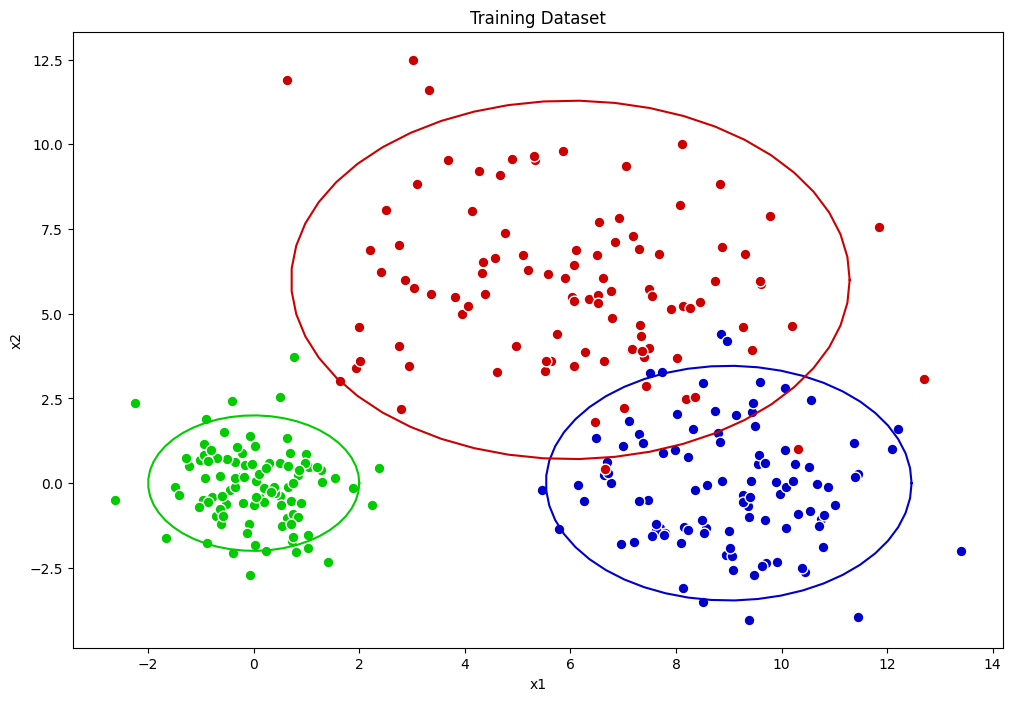

In [8]:
# 7.0 - Generate data with known parameters

nb_patterns = 100
# Generate random patterns for class 1
mu1 = np.array([0,0])
cov1 = np.array([[1,0],[0,1]])
# Generate random patterns for class 2
mu2 = np.array([9,0])
cov2 = np.array([[3,0],[0,3]])
# Generate random patterns for class 3
mu3 = np.array([6,6])
cov3 = np.array([[7,0],[0,7]])

######################
# YOUR CODE GOES HERE
######################

x1samples = distrib.MultivariateNormal(torch.Tensor(mu1), torch.Tensor(cov1)).sample((nb_patterns,))
x2samples = distrib.MultivariateNormal(torch.Tensor(mu2), torch.Tensor(cov2)).sample((nb_patterns,))
x3samples = distrib.MultivariateNormal(torch.Tensor(mu3), torch.Tensor(cov3)).sample((nb_patterns,))

######################
from cml.plot import gaussian_ellipsoid
# Prepare concatenated versions of class properties
mu_vals = {}; 
mu_vals[0] = np.array([mu1]).transpose() 
mu_vals[1] = np.array([mu2]).transpose() 
mu_vals[2] = np.array([mu3]).transpose()
cov_vals = {}
cov_vals[0] = cov1
cov_vals[1] = cov2
cov_vals[2] = cov3
# Plot the corresponding data
plt.figure(figsize=(12, 8))
plt.scatter(x1samples[:, 0], x1samples[:, 1], s=60, marker='o', color=[0, 0.8, 0], edgecolors='w')
plt.scatter(x2samples[:, 0], x2samples[:, 1], s=60, marker='o', color=[0, 0, 0.8], edgecolors='w')
plt.scatter(x3samples[:, 0], x3samples[:, 1], s=60, marker='o', color=[0.8, 0, 0], edgecolors='w')
h = gaussian_ellipsoid(mu1, cov1, 2, color=[0, 0.8, 0]); 
h = gaussian_ellipsoid(mu2, cov2, 2, color=[0, 0, 0.8]); 
h = gaussian_ellipsoid(mu3, cov3, 2, color=[0.8, 0, 0]);
plt.title('Training Dataset')
plt.ylabel('x2')
plt.xlabel('x1');

Here, our **objective function** is to maximize the discriminant function $g_i(\pmb x)$, which we define as the posterior probability to perform a **minimum-error classification** (Bayes classifier). 

$$
\begin{equation}
g_1(\pmb x) = p(y_1 \mid   \pmb{x}), \quad  g_2(\pmb{x}) = p(y_2 \mid   \pmb{x}), \quad  g_3(\pmb{x}) = p(y_3 \mid   \pmb{x})
\end{equation}
$$

So that our decision rule is to choose the class $\omega_i$ for which $g_i(\pmb x)$ is max., where  

 $$ 
 \begin{equation}
 \quad g_i(\pmb{x}) = \pmb{x}^{\,t} \bigg( - \frac{1}{2} \Sigma_i^{-1} \bigg) \pmb{x} + \bigg( \Sigma_i^{-1} \pmb{\mu}_{\,i}\bigg)^t \pmb x + \bigg( -\frac{1}{2} \pmb{\mu}_{\,i}^{\,t}  \Sigma_{i}^{-1} \pmb{\mu}_{\,i} -\frac{1}{2} ln(\left|\Sigma_i\right|)\bigg) 
 \end{equation}
 $$

***

**Exercise**

  1. Implement the discriminant function
  2. Implement the decision rule (classifier)
  3. Classify the data generated in the previous exercise
  4. Plot the confusion matrix
  5. Calculate the empirical error

***

In [ ]:
import operator

def discriminant_function(x_vec, mu_vec, cov_mat):
    # Calculates the value of the discriminant function for a dx1 dimensional
    # sample given the covariance matrix and mean vector.
    #
    #   x_vec: A dx1 dimensional numpy array representing the sample.
    #   cov_mat: numpy array of the covariance matrix.
    #   mu_vec: dx1 dimensional numpy array of the sample mean.
    #
    #   Returns a float value g as result of the discriminant function.

    ######################
    # YOUR CODE GOES HERE
    ###################### 
    g = x_vec.T @ (-1/2 * np.linalg.inv(cov_mat)) @ x_vec + (np.linalg.inv(cov_mat) @ mu_vec).T @ x_vec + (-1/2 * mu_vec.T @ np.linalg.inv(cov_mat) @ mu_vec) - 1/2 * np.log(np.linalg.det(cov_mat))
    
    
    return float(g)

def classify_data(x_vec, g, mu_vecs, cov_mats):
    #    Classifies an input sample into 1 out of 3 classes determined by
    #    maximizing the discriminant function g_i().

    #    Keyword arguments:
    #        x_vec: A dx1 dimensional numpy array representing the sample.
    #        g: The discriminant function.
    #        mu_vecs: A list of mean vectors as input for g.
    #        cov_mats: A list of covariance matrices as input for g.
    #    
    #    Returns the max probability and class id.

    ######################
    # YOUR CODE GOES HERE
    ######################
    
    return (max_value, max_index)

x1classes = np.zeros((nb_patterns, 1))
conf_matrix = np.zeros((3, 3))
for i in range(nb_patterns):
    x, g = classify_data(x1samples[i, :], discriminant_function, mu_vals, cov_vals);
    x1classes[i] = g;
    conf_matrix[0, g] = conf_matrix[0, g] + 1;
x2classes = np.zeros((nb_patterns, 1))
for i in range(nb_patterns):
    x, g = classify_data(x2samples[i, :], discriminant_function, mu_vals, cov_vals);
    x2classes[i] = g;
    conf_matrix[1, g] = conf_matrix[1, g] + 1;
x3classes = np.zeros((nb_patterns, 1))
for i in range(nb_patterns):
    x, g = classify_data(x3samples[i, :], discriminant_function, mu_vals, cov_vals);
    x3classes[i] = g;
    conf_matrix[2, g] = conf_matrix[2, g] + 1;

print('%16s \t %s \t %s \t %s\n' % (' ', 'class 1', 'class 2', 'class 3'));
print('%16s \t %f \t %f \t %f\n' % ('class 1', conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[0, 2]));
print('%16s \t %f \t %f \t %f\n' % ('class 2', conf_matrix[1, 0], conf_matrix[1, 1], conf_matrix[1, 2]));
print('%16s \t %f \t %f \t %f\n' % ('class 3', conf_matrix[2, 0], conf_matrix[2, 1], conf_matrix[2, 2]));

TypeError: 'ellipsis' object is not subscriptable

### Unknown parameters

In contrast to the previous case, let us assume that we only know the number of parameters for the class conditional densities $p (\pmb x \mid  y_i)$, and we want to use a Maximum Likelihood Estimation (MLE) to estimate the quantities of these parameters from the training data.


Given the information about the our model (the data is normal distributed) the 2 parameters to be estimated for each class are $\pmb \mu_i$ and $\pmb \Sigma_i$, which are summarized by the   
parameter vector 

$$
\begin{equation}
\pmb \theta_i = \bigg[ \begin{array}{c}
\ \theta_{i1} \\
\ \theta_{i2} \\
\end{array} \bigg]=
\bigg[ \begin{array}{c}
\pmb \mu_i \\
\pmb \Sigma_i \\
\end{array} \bigg]
\end{equation}
$$ 

For the Maximum Likelihood Estimate (MLE), we assume that we have a set of samples $D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\} $ that are *i.i.d.* (independent and identically distributed, drawn with probability $p(\pmb x \mid   y_i, \pmb \theta_i) )$.  Thus, we can **work with each class separately** and omit the class labels, so that we write the probability density as $p(\pmb x \mid \pmb \theta)$ 

**Likelihood of $ \pmb \theta $**

Thus, the probability of observing $D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\} $ is  

$$
\begin{equation}
p(D  \mid    \pmb \theta ) = p(\pmb x_1   \mid   \pmb \theta )  \cdot   p(\pmb x_2   \mid  \pmb \theta )   \cdot  ...    p(\pmb x_n   \mid   \pmb \theta ) = \prod_{k=1}^{n}   p(\pmb x_k \pmb   \mid   \pmb \theta  )
\end{equation}
$$  

Where $p(D  \mid    \pmb  \theta )$ is also called the ***likelihood of $\pmb\ \theta$***

We know that $p([x_1,x_2]^t)  ∼   N(\pmb \mu,\pmb \Sigma) $ (remember that we dropped the class labels, since we are working with every class separately). And the mutlivariate normal density is given as  

$$
\begin{equation}
\quad \quad p(\pmb x) = \frac{1}{(2\pi)^{d/2}   |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]
\end{equation}
$$  

Therefore, we obtain  

$$
\begin{equation}
p(D  \mid    \pmb \theta ) = \prod_{k=1}^{n}   p(\pmb x_k \pmb   \mid   \pmb \theta  ) =  \prod_{k=1}^{n}   \frac{1}{(2\pi)^{d/2}   |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]
\end{equation}
$$
and the log of the multivariate density

$$
\begin{equation}
l(\pmb\theta) =  \sum\limits_{k=1}^{n} - \frac{1}{2}(\pmb x - \pmb \mu)^t \pmb \Sigma^{-1}   (\pmb x - \pmb \mu) - \frac{d}{2}   ln   2\pi - \frac{1}{2}  ln   |\pmb\Sigma|
\end{equation}
$$

In order to obtain the MLE $\boldsymbol{\hat{\theta}}$, we maximize $l (\pmb  \theta)$, which can be done via differentiation  

$$
\begin{equation}
\nabla_{\pmb \theta} \equiv \begin{bmatrix}  
\frac{\partial   }{\partial   \theta_1} \\ 
\frac{\partial   }{\partial   \theta_2}
\end{bmatrix} = \begin{bmatrix} 
\frac{\partial   }{\partial   \pmb \mu} \\ 
\frac{\partial   }{\partial   \pmb \sigma}
\end{bmatrix}
\end{equation}
$$

$$
\begin{equation}
\nabla_{\pmb \theta} l = \sum\limits_{k=1}^n \nabla_{\pmb \theta}  ln  p(\pmb x| \pmb \theta) = 0 
\end{equation}
$$  

</div>{: .notice--blank}

***

**Exercise**
<div markdown = "1">

  1. Perform the differentiation for $\frac{\partial   \mathcal{L}}{\partial   \pmb \mu}$ to obtain the estimator of the mean $\hat{\mu}$
  2. Perform the differentiation for $\frac{\partial   \mathcal{L}}{\partial   \pmb \Sigma}$ to obtain the estimator of the covariance matrix $\hat{\Sigma}$
  3. Implement the two estimators as functions based on a set of data
  4. Apply these estimators (MLE) in order to obtain estimated parameters
  5. Re-compute the classification errors on the previous dataset
  
***


***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 1.2 - Finetuning the autoencoder

> 1. Transfer the weights from the pretrained layers to the full architecture
> 2. Fill in the training criterion and optimizer
> 2. Finish the training loop to finetune your deep AE
  
</div>

***

In [28]:
########################################################
# YOUR CODE GOES HERE (Perform mu estimates)
########################################################

mu_est_1 = ...
mu_est_2 = ...
mu_est_3 = ...

######################

print('%16s \t %s \t %s \t %s \t %s \t %s \t %s' % ('', 'mu1_1   ', 'mu1_2  ', 'mu2_1  ', 'mu2_2  ', 'mu3_1  ', 'mu3_2  '));
print('%16s \t %f \t %f \t %f \t %f \t %f \t %f' % ('MLE', mu_est_1[0], mu_est_1[1], mu_est_2[0], mu_est_2[1], mu_est_3[0], mu_est_3[1]));
print('%16s \t %f \t %f \t %f \t %f \t %f \t %f' % ('Truth', mu1[0], mu1[1], mu2[0], mu2[1], mu3[0], mu3[1]));

def mle_covariance(x_samples, mu_est):
    #    Calculates the Maximum Likelihood Estimate for the covariance matrix.
    #    
    #    Keyword Arguments:
    #        x_samples: np.array of the samples for 1 class, n x d dimensional 
    #        mu_est: np.array of the mean MLE, d x 1 dimensional
    #        
    #    Returns the MLE for the covariance matrix as d x d numpy array.
    
    ######################
    # YOUR CODE GOES HERE
    ######################
    
    return cov_est

cov_est_1 = mle_covariance(x1samples, np.array([mu_est_1]).transpose());
cov_est_2 = mle_covariance(x2samples, np.array([mu_est_2]).transpose());
cov_est_3 = mle_covariance(x3samples, np.array([mu_est_3]).transpose());

print('%16s \t %s \t %s \t %s \t %s \t %s \t %s' % ('', 'cov1_1   ', 'cov1_2  ', 'cov2_1  ', 'cov2_2  ', 'cov3_1  ', 'cov3_2  '));
print('%16s \t %f \t %f \t %f \t %f \t %f \t %f' % ('MLE', cov_est_1[0, 0], cov_est_1[1, 0], cov_est_2[0, 0], cov_est_2[1, 0], cov_est_3[0, 0], cov_est_3[1, 0]));
print('%16s \t %f \t %f \t %f \t %f \t %f \t %f' % ('Truth', cov1[0, 0], cov1[1, 0], cov2[0, 0], cov2[1, 0], cov3[0, 0], cov3[1, 0]));

mu_estimates = {}; 
mu_estimates[0] = np.array([mu_est_1]).transpose()  
mu_estimates[1] = np.array([mu_est_2]).transpose()  
mu_estimates[2] = np.array([mu_est_3]).transpose() 
cov_estimates = {}; 
cov_estimates[0] = cov_est_1; 
cov_estimates[1] = cov_est_2; 
cov_estimates[2] = cov_est_3;

# Plot the corresponding data
plt.figure(figsize=(12, 8))
plt.scatter(x1samples[:,0], x1samples[:,1], s=40, marker='o', color=[0, 0.8, 0], edgecolors='w');
plt.scatter(x2samples[:,0], x2samples[:,1], s=40, marker='s', color=[0, 0, 0.8], edgecolors='w');
plt.scatter(x3samples[:,0], x3samples[:,1], s=40, marker='^', color=[0.8, 0, 0], edgecolors='w');
h = gaussian_ellipsoid(mu1, cov1, 2, color=[0.2, 0.6, 0.2]);
h = gaussian_ellipsoid(mu2, cov2, 2, color=[0.2, 0.2, 0.6]);
h = gaussian_ellipsoid(mu3, cov3, 2, color=[0.6, 0.2, 0.2]);
h = gaussian_ellipsoid(mu_est_1, cov_est_1, 2, color=[0.1, 0.99, 0.1]);
h = gaussian_ellipsoid(mu_est_2, cov_est_2, 2, color=[0.1, 0.1, 0.99]);
h = gaussian_ellipsoid(mu_est_3, cov_est_3, 2, color=[0.99, 0.1, 0.1]);
plt.title('Comparing estimated MLE Gaussians');

                 	 mu1_1    	 mu1_2   	 mu2_1   	 mu2_2   	 mu3_1   	 mu3_2  


TypeError: 'ellipsis' object is not subscriptable